In [20]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data import and basic statistics

In [82]:
data = pd.read_csv('D://mag//BI//Machine_learning//HeartDisease//HeartDiseaseData.csv', index_col=0)
print(data.shape)
data.head()

(457, 13)


,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
1,1,28,male,atypical angina,130.0,132.0,False,showing probable or definite left ventricular ...,185.0,no,0.0,0,Hungary
2,2,29,male,atypical angina,120.0,243.0,False,normal,160.0,no,0.0,0,Hungary
3,3,29,male,atypical angina,140.0,NaN,False,normal,170.0,no,0.0,0,Hungary
4,4,30,female,typical angina,170.0,237.0,False,having ST-T wave abnormality (T wave inversion...,170.0,no,0.0,0,Hungary
5,5,31,female,atypical angina,100.0,219.0,False,having ST-T wave abnormality (T wave inversion...,150.0,no,0.0,0,Hungary


In [10]:
data.describe()

,ID,Age,trestbps,chol,thalach,oldpeak,num
count,457.000000,457.000000,424.000000,431.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,131.488208,200.048724,134.910377,0.622090,0.459519
std,132.068795,9.219588,18.829454,113.463794,24.251177,0.922115,0.498905
min,1.000000,28.000000,80.000000,0.000000,69.000000,-2.600000,0.000000
25%,115.000000,45.000000,120.000000,171.000000,118.000000,0.000000,0.000000
50%,229.000000,52.000000,130.000000,220.000000,135.000000,0.000000,0.000000
75%,343.000000,57.000000,140.000000,269.500000,150.000000,1.000000,1.000000
max,457.000000,75.000000,200.000000,603.000000,190.000000,5.000000,1.000000


In [11]:
#filtering numeric data only
data_num = data.drop(['ID', 'Sex', 'cp', 'fbs', 'restecg', 'exang', 'Place'], axis=1)
data_num.head()

,Age,trestbps,chol,thalach,oldpeak,num
1,28,130.0,132.0,185.0,0.0,0
2,29,120.0,243.0,160.0,0.0,0
3,29,140.0,NaN,170.0,0.0,0
4,30,170.0,237.0,170.0,0.0,0
5,31,100.0,219.0,150.0,0.0,0


C:\Users\SONY\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\SONY\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\SONY\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\SONY\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


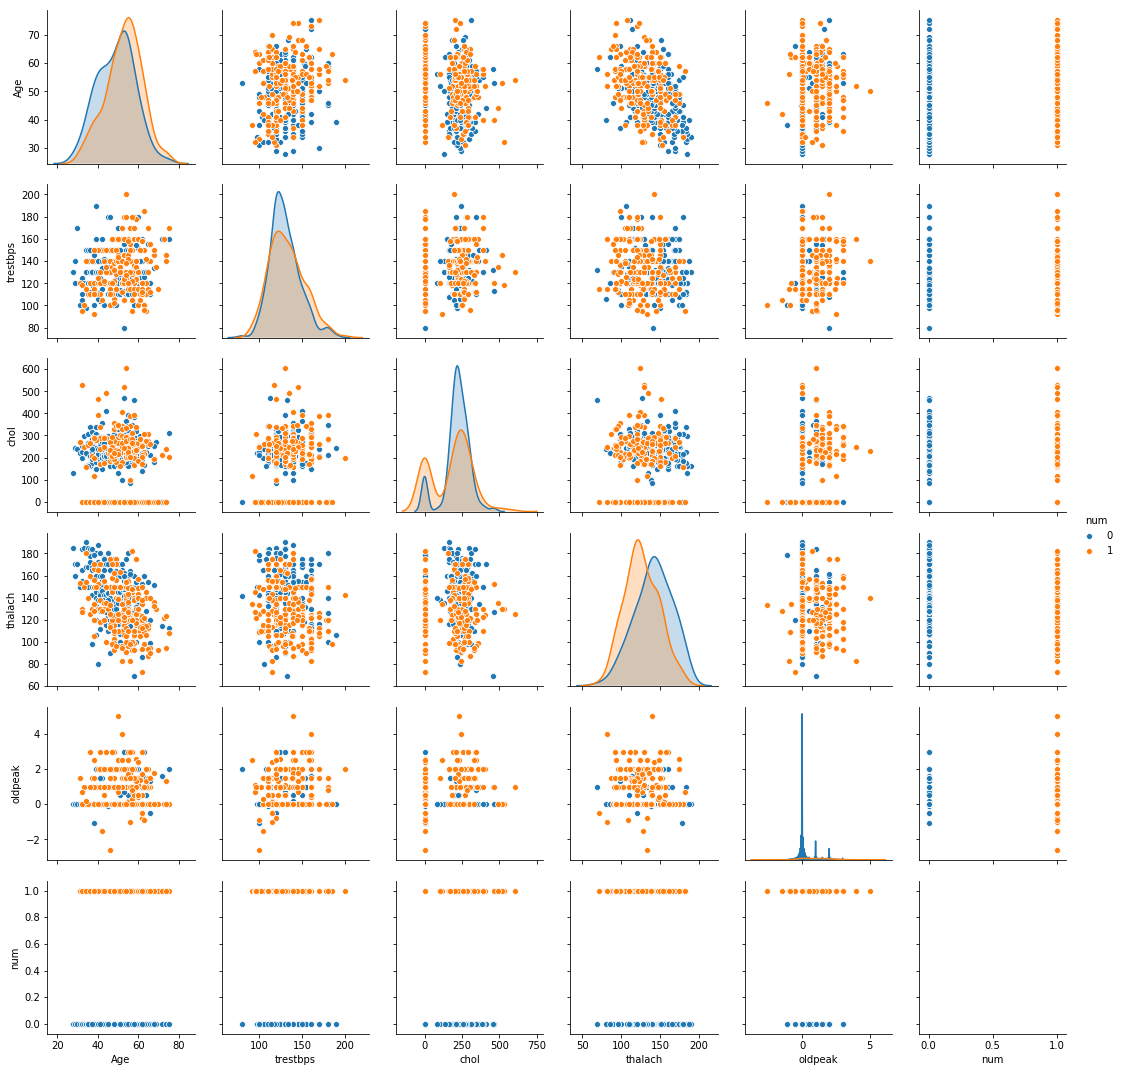

In [12]:
sns.pairplot(data_num, hue = "num")
# see no strong correlations here
# has some errors due to NaN values - need to be removed

In [83]:
data.isnull().sum()

ID           0
Age          0
Sex          0
cp           0
trestbps    33
chol        26
fbs         54
restecg      2
thalach     33
exang       33
oldpeak     36
num          0
Place        0
dtype: int64

In [84]:
#substituted NAs in numeric data for the median values
data = data.fillna({'trestbps': data.trestbps.median()})
data = data.fillna({'chol': data.chol.median()})
data.groupby('fbs').count().iloc[:,0]

fbs
False    347
True      56
Name: ID, dtype: int64

In [85]:
data.loc[data['fbs'].isnull(),'fbs'] = False  # substituted for the most frequent value
data = data.loc[~data['oldpeak'].isnull()]  # dropped these
#data.isnull().sum()
data.loc[(data['restecg'].isnull()) | (data['thalach'].isnull()) | (data['exang'].isnull())]

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
91,91,48,female,atypical angina,130.0,308.0,False,having ST-T wave abnormality (T wave inversion...,NaN,NaN,2.0,0,Hungary
269,269,55,male,typical angina,140.0,295.0,False,NaN,136.0,no,0.0,1,Hungary
296,296,34,male,asymptomatic,115.0,0.0,False,NaN,154.0,no,0.2,1,Switzerland


In [86]:
data = data.drop([91, 269, 296], axis=0)  # dropped these three too =)
data.isnull().sum()

ID          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
Place       0
dtype: int64

In [87]:
data.dtypes

ID            int64
Age           int64
Sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalach     float64
exang        object
oldpeak     float64
num           int64
Place        object
dtype: object

In [92]:
data = pd.get_dummies(data.drop("ID", axis=1))
print(data.shape)
data.head()
#I guess the data preparation is finally over

(418, 21)


,Age,trestbps,chol,fbs,thalach,oldpeak,num,Sex_female,Sex_male,cp_asymptomatic,...,cp_non-anginal pain,cp_typical angina,restecg_having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV,restecg_normal,restecg_showing probable or definite left ventricular hypertrophy by Estes criteria,exang_no,exang_yes,Place_Hungary,Place_Switzerland,Place_VA
1,28,130.0,132.0,False,185.0,0.0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0
2,29,120.0,243.0,False,160.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
3,29,140.0,220.0,False,170.0,0.0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
4,30,170.0,237.0,False,170.0,0.0,0,1,0,0,...,0,1,1,0,0,1,0,1,0,0
5,31,100.0,219.0,False,150.0,0.0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0


let's grow a tree now

In [93]:
X = data.drop('num', axis=1)
y = data.num
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
clf.score(X, y)
#tree made using all the data is overeducated

1.0

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [101]:
from IPython.display import SVG
from graphviz import Source
#too bad - graphviz is not found even though it is installed
#that makes me a very saaaad panda...

ModuleNotFoundError: No module named 'graphviz'

In [100]:
from IPython.display import display
from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)

In [102]:
style = "<style>svg{width:10% !important;height:10% !important;}</style>"
HTML(style)
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=list(X), class_names=['num = 1', 'num = 0'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))
# no graphviz - no tree-viewing today T__T

NameError: name 'Source' is not defined

In [97]:
clf.score(X_train, y_train)

1.0

In [98]:
clf.score(X_test, y_test)

0.6956521739130435

In [96]:
clf.score(X, y)
#that's also bad

0.8995215311004785

In [108]:
max_depth_values = range(1, 20)
classifier_score_data = pd.DataFrame()
for max_dept in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_dept)
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    
    classifier_score_data = classifier_score_data \
        .append(pd.DataFrame({'test_score': [test_score], 'train_score': [train_score], 'max_dept': [max_dept]}))
classifier_score_data.head(10)

,test_score,train_score,max_dept
0,0.724638,0.775000,1
0,0.710145,0.789286,2
0,0.717391,0.803571,3
0,0.717391,0.842857,4
0,0.644928,0.882143,5
0,0.681159,0.914286,6
0,0.702899,0.950000,7
0,0.681159,0.964286,8
0,0.724638,0.985714,9
0,0.695652,1.000000,10


In [109]:
classifier_score_data = pd.melt(classifier_score_data,id_vars=['max_dept'], var_name='set_type', value_name='score')
classifier_score_data.head(10)

,max_dept,set_type,score
0,1,test_score,0.724638
1,2,test_score,0.710145
2,3,test_score,0.717391
3,4,test_score,0.717391
4,5,test_score,0.644928
5,6,test_score,0.681159
6,7,test_score,0.702899
7,8,test_score,0.681159
8,9,test_score,0.724638
9,10,test_score,0.695652


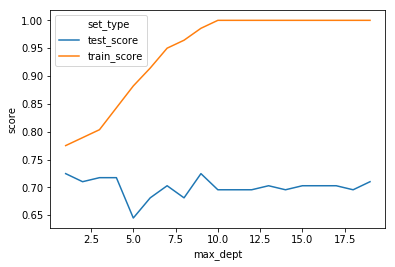

In [110]:
ax = sns.lineplot(x="max_dept", y="score",
                   hue="set_type", data=classifier_score_data)

The score at the depth of 1 is the best so far...
Looks very bad. Maybe the tree is not a good solution here at al?..